<h1>Group assignment team 11</h1>

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns


import rdkit
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit import DataStructs

import ptitprince as pt

#randomforestclassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

<h2>Datset Preperations</h2>

In [86]:
df = pd.read_csv('tested_molecules-1.csv')
smiles_good_inhibitor = df[df['ALDH1_inhibition'] == 1].reset_index()
smiles_bad_inhibitor = df[df['ALDH1_inhibition'] == 0].reset_index()

In [87]:
def plot_mol (smiles_df, molecule_index):
    smiles = smiles_df['SMILES'][molecule_index]
    mol =Chem.MolFromSmiles(smiles)
    Draw.MolToMPL(mol, size=(200, 200))


In [88]:
def plot_list_mol(smiles_df):
    mol_list = []
    for smiles in smiles_df:
        for smiles in smiles_df['SMILES']:    # assuming your column is called Smiles
            mol = Chem.MolFromSmiles(smiles)
            Chem.SanitizeMol(mol,sanitizeOps=Chem.SANITIZE_SYMMRINGS|Chem.SANITIZE_SETCONJUGATION|Chem.SANITIZE_SETHYBRIDIZATION)
            mol.Compute2DCoords()
            mol_list.append(mol)
            Draw.MolToMPL(mol, size=(200, 200))

In [89]:
data = df.copy(deep=True)
molecules = data.SMILES.apply(Chem.MolFromSmiles)
data.loc[:, 'MolLogP'] = molecules.apply(Descriptors.MolLogP)
data.loc[:, 'HeavyAtomCount'] = molecules.apply(Descriptors.HeavyAtomCount)
data.loc[:, 'HAccept'] = molecules.apply(Descriptors.NumHAcceptors)
data.loc[:, 'Heteroatoms'] = molecules.apply(Descriptors.NumHeteroatoms)
data.loc[:, 'HDonor'] = molecules.apply(Descriptors.NumHDonors)
data.loc[:, 'MolWt'] = molecules.apply(Descriptors.MolWt)
data.loc[:, 'RotableBonds'] = molecules.apply(Descriptors.NumRotatableBonds)
data.loc[:, 'RingCount'] = molecules.apply(Descriptors.RingCount)
data.loc[:, 'Ipc'] = molecules.apply(Descriptors.Ipc)
data.loc[:, 'HallKierAlpha'] = molecules.apply(Descriptors.HallKierAlpha)
data.loc[:, 'NumValenceElectrons'] = molecules.apply(Descriptors.NumValenceElectrons)
data.loc[:, 'SaturatedRings'] = molecules.apply(Descriptors.NumSaturatedRings)
data.loc[:, 'AliphaticRings'] = molecules.apply(Descriptors.NumAliphaticRings)
data.loc[:, 'AromaticRings'] = molecules.apply(Descriptors.NumAromaticRings)
data.loc[:, 'Heterocycles'] = molecules.apply(Descriptors.NumAromaticHeterocycles)
data.loc[:, 'AmideBonds'] = [AllChem.CalcNumAmideBonds(x) for x in molecules]
data.loc[:, 'LipinskiHBA'] = [AllChem.CalcNumLipinskiHBA(x) for x in molecules]
data.loc[:, 'LipinskiHBD'] = [AllChem.CalcNumLipinskiHBD(x) for x in molecules]

In [90]:
data

,SMILES,ALDH1_inhibition,MolLogP,HeavyAtomCount,HAccept,Heteroatoms,HDonor,MolWt,RotableBonds,RingCount,Ipc,HallKierAlpha,NumValenceElectrons,SaturatedRings,AliphaticRings,AromaticRings,Heterocycles,AmideBonds,LipinskiHBA,LipinskiHBD
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1,1.50330,34,8,10,2,463.542,8,4,6.958111e+07,-3.95,178,1,1,3,1,2,10,2
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1,3.48110,27,6,7,1,378.457,7,4,3.137659e+06,-3.06,136,0,0,4,3,1,6,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1,2.83782,35,8,9,2,477.589,9,5,1.436707e+08,-3.30,184,1,1,4,3,0,9,2
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1,4.05510,18,3,5,0,330.609,3,2,1.207136e+04,-1.00,96,0,0,2,1,0,3,0
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1,3.37490,27,6,9,1,419.553,5,4,1.948182e+06,-2.23,140,0,1,3,2,1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,COc1ccc(N2C(=O)CC([NH2+]C3CC3)C2=O)cc1,0,0.05290,19,3,5,1,261.301,4,3,4.581294e+04,-1.88,100,2,2,1,0,2,5,2
996,CCNc1oc(COc2cccc(C)c2)nc1C#N,0,2.86550,19,5,5,1,257.293,5,2,2.727871e+04,-2.48,98,0,0,2,1,0,5,1
997,NC(=O)Cn1cnc(-c2ccccc2)c1,0,1.03540,15,3,4,1,201.229,3,2,4.126498e+03,-2.10,76,0,0,2,1,1,4,2
998,Cc1cc(NC(=O)CSc2nc3c(c(=O)n(C)c(=O)n3C)n2C(C)C...,0,1.04182,27,10,11,1,392.441,5,3,1.115768e+06,-2.82,144,0,0,3,3,1,10,1


In [91]:
# Check for duplicated rows
duplicated_rows = data.duplicated()
sum_duplicated_rows = duplicated_rows.sum()
print("Amount of duplicated rows:", sum_duplicated_rows)

# Check for missing data
missing_data = data.isnull().sum()
print('Amount of missing data per column:\n', missing_data)

Amount of duplicated rows: 0
Amount of missing data per column:
 SMILES                 0
ALDH1_inhibition       0
MolLogP                0
HeavyAtomCount         0
HAccept                0
Heteroatoms            0
HDonor                 0
MolWt                  0
RotableBonds           0
RingCount              0
Ipc                    0
HallKierAlpha          0
NumValenceElectrons    0
SaturatedRings         0
AliphaticRings         0
AromaticRings          0
Heterocycles           0
AmideBonds             0
LipinskiHBA            0
LipinskiHBD            0
dtype: int64


<h2>Exploratory Data analysis</h2>

In [103]:
# Calculate the correlation between 'ALH1_inhibition' column and other variables
correlation = data.iloc[:, 2:].corrwith(data['ALDH1_inhibition'])

# Sort the correlation values from high to low
correlation_sorted = abs(correlation).sort_values(ascending=False)

print('The correlation between the binary results and the variables (high to low):\n'
      ,correlation_sorted)

The correlation between the binary results and the variables (high to low):
 MolWt                  0.146653
HeavyAtomCount         0.127556
NumValenceElectrons    0.118910
RingCount              0.113688
Heteroatoms            0.111909
HAccept                0.108694
AliphaticRings         0.094785
MolLogP                0.093240
LipinskiHBA            0.087870
HallKierAlpha          0.074968
RotableBonds           0.060500
SaturatedRings         0.053336
LipinskiHBD            0.043226
HDonor                 0.036696
AromaticRings          0.034309
Ipc                    0.012114
AmideBonds             0.011479
Heterocycles           0.007696
dtype: float64


In [95]:
# Calculate the distribution of 'ALH1_inhibition' column as percentages
distribution = data['ALDH1_inhibition'].value_counts(normalize=True) * 100
print(distribution)

#TODO: data is niet gelijk verdeeld, er moet dus scaling nog gedaan worden

ALDH1_inhibition
0    70.0
1    30.0
Name: proportion, dtype: float64


In [84]:
#Endless boxplot generating
"""
data_boxplot = data.select_dtypes(exclude=['object','string'])
for column in data_boxplot:
    plt.figure()
    data_boxplot.boxplot(by='ALDH1_inhibition',column= [column])
"""

"\ndata_boxplot = data.select_dtypes(exclude=['object','string'])\nfor column in data_boxplot:\n    plt.figure()\n    data_boxplot.boxplot(by='ALDH1_inhibition',column= [column])\n"

D:\Docs\8CC00\8CC00env\lib\site-packages\ptitprince\PtitPrince.py:61: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  hue_mask = np.ones(group_data.size, np.bool)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

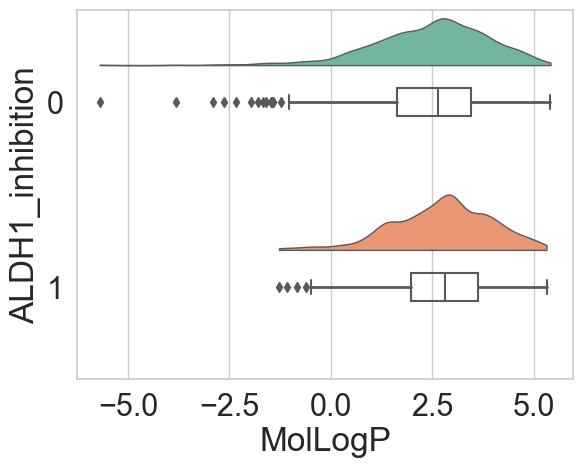

In [68]:
#TODO: The figures are not saving and i do not know why. I think these rain plots are better then the simple boxplots.

import os
import seaborn as sns
import ptitprince as pt

# Variables
savefigs = True
variable_to_fig = 'MolLogP'
figs_dir = r'D:\Docs\8CC00\figs group AP'

# Main code
sns.set(style="whitegrid", font_scale=2)
dx = "ALDH1_inhibition"
dy = variable_to_fig
ort = "h"
pal = "Set2"
sigma = .2

# Create a new figure and axes
f, ax = pt.RainCloud(x=dx, y=dy, data=data, palette=pal, bw=sigma, width_viol=.6, orient=ort, move=.2)

# Set the title and labels
ax.set_title(f"Raincloud plot {dy} vs diagnostic label")
ax.set_ylabel('Diagnostic label')

if savefigs:
    os.makedirs(figs_dir, exist_ok=True)
    fig_path = os.path.join(figs_dir, f'raincloud_{dy}.png')
    f.savefig(fig_path, bbox_inches='tight', facecolor='white')
    print(f"Plot saved at: {fig_path}")

sns.reset_orig()

<h2>Identification of structure-activity relationships</h2>

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [118]:
X = data.iloc[:, 2:]  # Features
y = data.iloc[:, 1]  # ALDH1_inhibition

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [119]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


In [ ]:
#TODO save the model

<h2>Selection of top 100</h2>

In [ ]:
#TODO use the model to predict which of the molecules will be succesfull.
#TODO find out how we are selecting the best choices